# 生成5类非均匀分布的二维数据

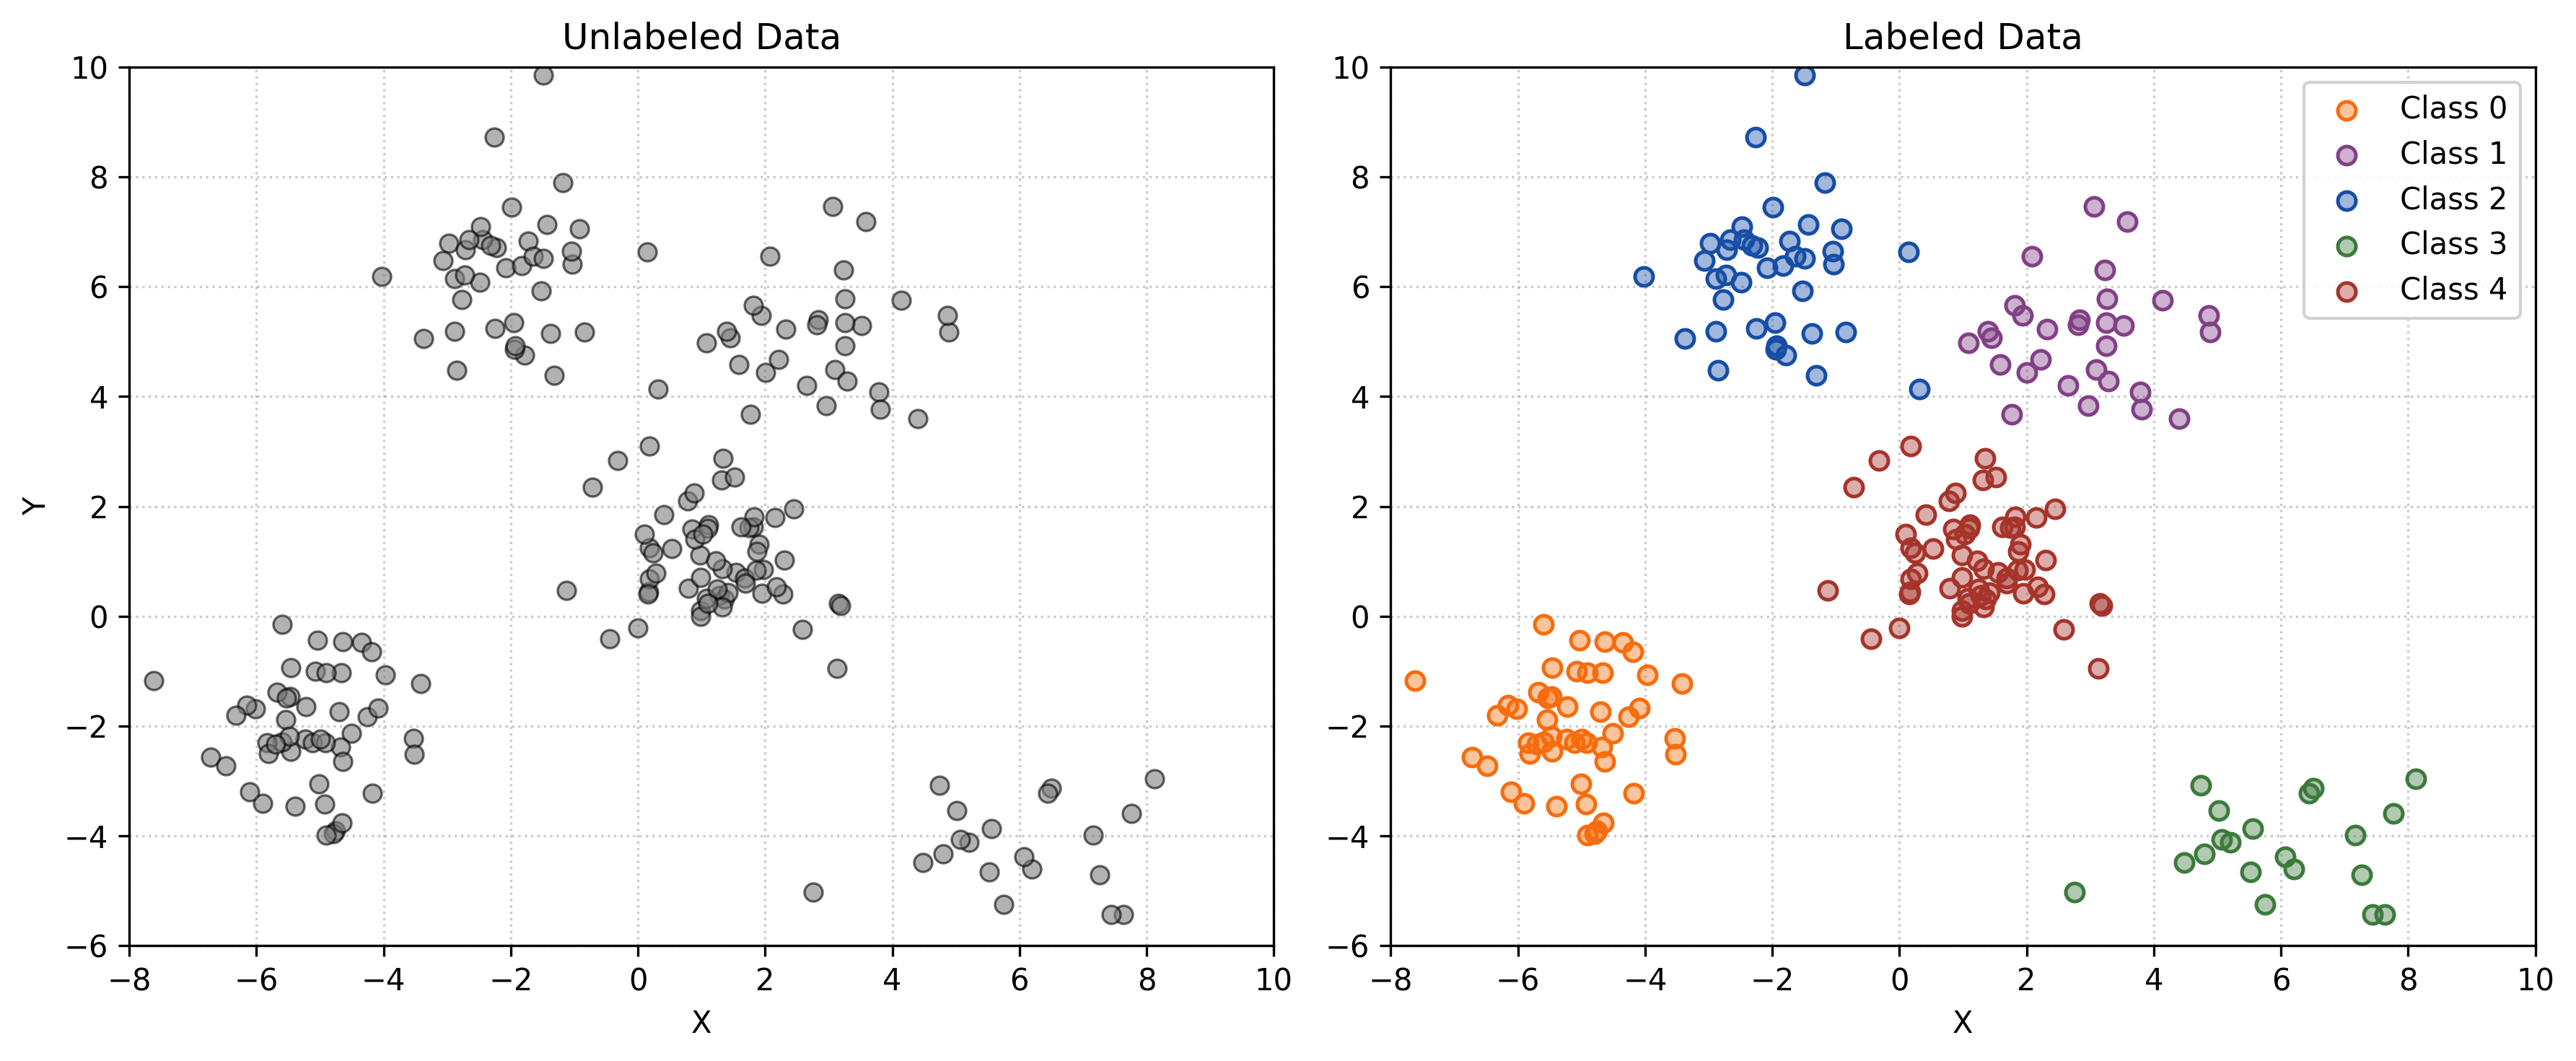

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 设置随机种子，确保可重复性
np.random.seed(42)

# 定义5个类别的中心与样本量大小
centers = [(-5, -2), (3, 5), (-2, 6), (6, -4), (1, 1)]
num_samples = [50, 30, 40, 20, 60]  # 总和200

# 生成数据
X, y = [], []
for i, (cx, cy) in enumerate(centers):
    X.append(np.random.randn(num_samples[i], 2) + np.array([cx, cy]))
    y.extend([i] * num_samples[i])

# 转换为 numpy 数组
X = np.vstack(X)
y = np.array(y)

# ===== 预定义颜色 =====
# 原始颜色定义（RGB 0-1范围）
class_colors = [
    (0.97, 0.424, 0.046),   # Class 0
    (0.505, 0.25, 0.52),    # Class 1
    (22/255, 77/255, 166/255),  # Class 2
    (0.235, 0.48, 0.235),   # Class 3
    (0.65, 0.204, 0.169)    # Class 4
]

# 创建双画布
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), dpi=300)

# 左图：不带标签的统一样式
ax1.scatter(X[:,0], X[:,1], 
           c='grey',         # 填充色为灰色
           edgecolor='black',# 边框为黑色
           alpha=0.6,        # 整体透明度
           linewidths=0.8)   # 边框粗细
ax1.set(xlabel="X", ylabel="Y", title="Unlabeled Data")

# 右图：带标签的样式（边框彩色+半透明填充）
for i in range(5):
    # 创建半透明填充色（原色 + alpha通道）
    face_color = (*class_colors[i], 0.4)  # RGBA格式，最后一位是透明度
    
    ax2.scatter(X[y == i, 0], X[y == i, 1],
                facecolors=[face_color],  # 半透明填充
                edgecolors=[class_colors[i]],  # 原色边框
                linewidths=1.2,          # 边框粗细
                label=f'Class {i}',
                zorder=2)                # 确保点在网格线上方

ax2.legend(loc='upper right', framealpha=0.9)
ax2.set(xlabel="X", title="Labeled Data")

# 统一设置坐标范围和网格
for ax in [ax1, ax2]:
    ax.set(xlim=(-8, 10), ylim=(-6, 10))
    ax.grid(True, linestyle=':', color='gray', alpha=0.4)

plt.tight_layout()
plt.show()
